<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

### Principle Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma = [
    [2, 0.8],
    [0.8, 0.6]
]

meu = [1.2, 2.2]

In [3]:
data = np.random.multivariate_normal(meu, sigma, 100)

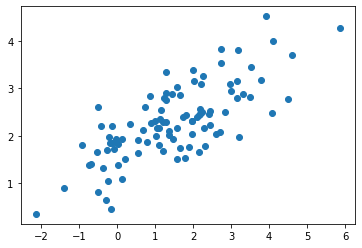

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

<img src="https://dataconomy.com/wp-content/uploads/2016/01/pic2.png">

Step1: Standardize

Step 2: Compute eigen values and eigen vectors of sigma

In [5]:
var_covar = np.cov(data.T)

In [6]:
eig_val, eig_vec = np.linalg.eig(var_covar)

Step 3: Select no of components to reduce data into (k) by looking into eigen values

Step 4: Select k-number of max-eigen values

In [7]:
eig_val

array([2.5034942 , 0.23056615])

In [8]:
2.93 /  (2.93 + 0.24)

0.9242902208201893

In [9]:
eig_vec = eig_vec.T

Step 5: Select k corresponding eigen vectors of selected eigen-values

In [10]:
pca1 = eig_vec[0]

Step 6: Project into new eigen vectors
(Apply dot product keeping shape in mind)

In [11]:
reduced_data = data.dot(pca1)

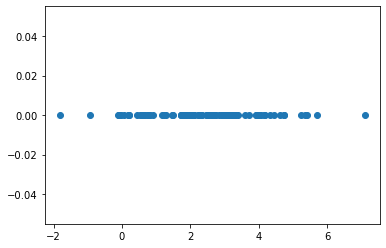

In [12]:
plt.scatter(reduced_data, np.zeros(100))
plt.show()

#### PCA on Iris Dataset

In [13]:
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()

In [15]:
X = iris.data

In [16]:
y = iris.target

In [17]:
sigma = np.cov(X.T)

In [18]:
sigma #var-covar matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [19]:
eig_val, eig_vec = np.linalg.eig(sigma)

In [20]:
eig_vec = eig_vec.T

In [21]:
eig_val

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [22]:
(4.22824 + 0.24267) / np.sum(eig_val) #varience preserved by 2-dimension 

0.9776846696937028

In [23]:
new_axis = eig_vec[[0,1]] #select corresponding eigen-vectors

In [24]:
new_axis.shape

(2, 4)

In [25]:
X.shape

(150, 4)

In [26]:
reduced = X.dot(new_axis.T) #dot product keeping shape in mind

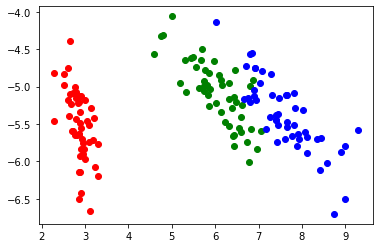

In [27]:
plt.scatter(reduced[y==0, 0], reduced[y==0, 1], color="r")
plt.scatter(reduced[y==1, 0], reduced[y==1, 1], color="g")
plt.scatter(reduced[y==2, 0], reduced[y==2, 1], color="b")
plt.show()

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
reduced = pca.transform(X)

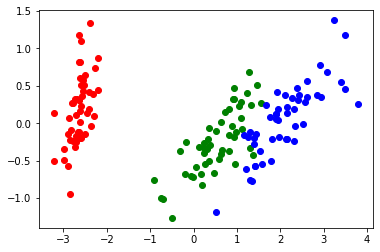

In [32]:
plt.scatter(reduced[y==0, 0], reduced[y==0, 1], color="r")
plt.scatter(reduced[y==1, 0], reduced[y==1, 1], color="g")
plt.scatter(reduced[y==2, 0], reduced[y==2, 1], color="b")
plt.show()

In [33]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [34]:
#Total information preserved
np.sum(pca.explained_variance_ratio_)

0.9776852063187949